# Finding Interesting Patterns in Data

Finding the origins of cholera's spread was a contentious issue in the 1800s. Before even seeing the problem in the data, the people of that time could see cholera **all around them**. As friends and relatives grew gravely ill, it became urgent to discover **why** this was happening in hopes of putting a stop to it. 

People, including the local media, had different ideas about what could be causing cholera. For instance, take a look at the following political cartoon of the time: 
<br>

<table><tr>
    <td> <img src="https://raw.githubusercontent.com/ArgonneEducation/ai_for_science_teacher_institute/refs/heads/main/imgs/king_cholera.png" alt="Drawing" style="width: 600px;"/> </td>
</tr></table>

<br>

In [1]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt

19th Century London was divided into districts, much like Chicago is divided into neighborhoods. These districts were grouped by region, just like Chicago (South Side, North Side, West side, Far South Side, etc.). There were 5 regions in 19th Century London: North, South, East, West and Central.

<br>

<img src="https://i2.wp.com/londontopia.net/wp-content/uploads/2014/08/london-county.jpg" width=600>

To begin, let's look at some data about a particulary bad cholera outbreak in London in 1849. Demographic data and data about the outbreak are contained in the `outbreak_of_1849.csv` file in the `data` folder.

In [2]:
outbreak = pd.read_csv("https://raw.githubusercontent.com/ArgonneEducation/ai_for_science_teacher_institute/refs/heads/main/data/outbreak_of_1849.csv")
outbreak.head()

,district,region,population,area,elevation,number_houses,house_value_average,deaths
0,Bermondsey,South,48128,688,0,5674,18,734
1,Bethnal Green,East,90193,760,38,11782,9,789
2,Camberwell,South,54667,4342,4,6843,25,504
3,Chelsea,West,56538,865,12,5648,29,247
4,City of London,Central,55932,434,31,7921,117,207


We will use mortality rate as our **outcome variable**:

This is done with the following calculation:
$$death \ rate = {deaths \over population} \times 1000$$

Make a new column of data called `deaths_per_1000` that includes the mortality rate of each district.

In [3]:
# Calculate mortality rate per 1,000 people. 
# The "/" means that we divide every item in the "deaths" column by every item in the "population" column.
# The "*" means that we multiply every value (for our new Outcome variable) by 1000. 

outbreak['deaths_per_1000'] = outbreak['deaths'] / outbreak['population'] * 1000

outbreak.head()

,district,region,population,area,elevation,number_houses,house_value_average,deaths,deaths_per_1000
0,Bermondsey,South,48128,688,0,5674,18,734,15.250997
1,Bethnal Green,East,90193,760,38,11782,9,789,8.747907
2,Camberwell,South,54667,4342,4,6843,25,504,9.219456
3,Chelsea,West,56538,865,12,5648,29,247,4.368743
4,City of London,Central,55932,434,31,7921,117,207,3.700923


While there should be only one outcome variable, there can be multiple **explanatory variables**.

Our job now is to explore explanatory variables that could potentially explain differences in mortality rate among the different disctricts. 

### Is there a relationship between mortality and where people live?

Use the `groupby()` function to average the mortality rates for each `region` of London.

In [4]:
# Group by region and calculate the mean of deaths_per_1000
average_mortality_by_region = outbreak.groupby('region')['deaths_per_1000'].mean()

average_mortality_by_region

region
Central     5.021616
East        6.326963
North       1.780560
South      12.599687
West        3.298961
Name: deaths_per_1000, dtype: float64

## Using Scatter Plots to Find Relationships

Scatter plots are especially useful in enabling people to study the relationship between an outcome variable and an explanatory variable.

**Make a scatter plot showing the relationship between a potential explanatory variable and the mortality rate.**

In [ ]:
import numpy as np

Note: you may need to restart the kernel to use updated packages.


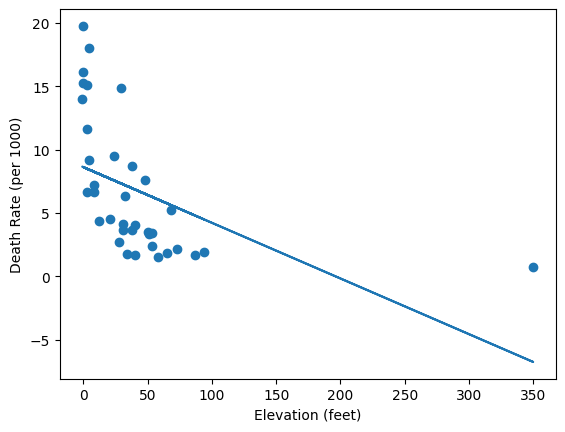

In [ ]:
# Generate scatterplots of variables vs. mortality

#set the x and y variables to use for the plot
x = outbreak['elevation']
y = outbreak['deaths_per_1000']

# Put the dots on the plot
# the plt indicates that we are using the matplotlib library and pyplot
plt.scatter(x, y)

# Here we add a 'line of best fit' that helps us visualize potential correlation!
# the np indicates that we are using the numpy library to calculate slope and intercept values

m, b = np.polyfit(x, y, 1)

# Put the line of best fit on the plot. 
plt.plot(x, m*x + b)


plt.xlabel('Elevation (feet)')
plt.ylabel('Death Rate (per 1000)')


# The above text all sets up how the plot will look.  The final step is below.
# This code will show or reveal the plot. 
plt.show()


### Continue Exploring

Generate additional scatter plots for other explanatory variables or use the `.groupby()` function to compare groups.

**Challenge Yourself: Develop new explanatory variables from the data you have.**

In [16]:
# Calculate averages after filtering and compare

# Population density
outbreak["pop_density"] = outbreak["population"]/outbreak["area"]
outbreak.head()

ByRegion = outbreak.groupby("region")[["deaths_per_1000", "pop_density"]].agg('mean')
ByRegion

# This code groups the outbreak dataFrame by region, and specifies which columns to
#  aggregate by mean, and outputs a new dataFrame called ByRegion with these means.

,deaths_per_1000,pop_density
region,,
Central,5.021616,224.601519
East,6.326963,131.270224
North,1.780560,43.330858
South,12.599687,64.310969
West,3.298961,86.505475


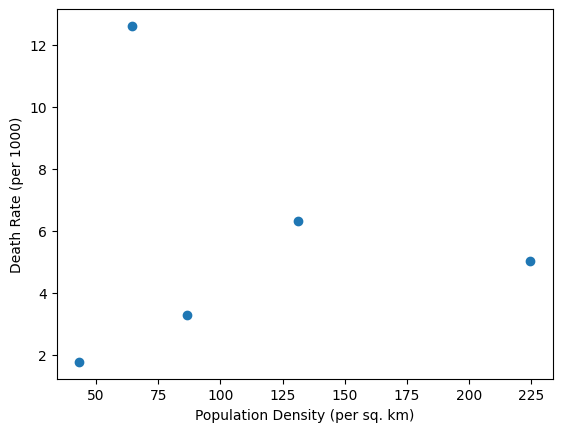

In [23]:
# Generate scatterplots of variables vs. mortality

#set the x and y variables to use for the plot
x = ByRegion['pop_density']
y = ByRegion['deaths_per_1000']

# Put the dots on the plot
# the plt indicates that we are using the matplotlib library and pyplot
plt.scatter(x, y)

# Here we add a 'line of best fit' that helps us visualize potential correlation!
# the np indicates that we are using the numpy library to calculate slope and intercept values

plt.xlabel('Population Density (per sq. km)')
plt.ylabel('Death Rate (per 1000)')

# The above text all sets up how the plot will look.  The final step is below.
# This code will show or reveal the plot. 
plt.show()

In [21]:
# Calculate averages after filtering and compare

ByDistrict = outbreak.groupby("district")[["deaths_per_1000", "pop_density", "elevation"]].agg('mean')
ByDistrict.sort_values(by='deaths_per_1000', ascending=False, inplace=True)
ByDistrict

# This code groups the outbreak dataFrame by district, and specifies which columns to
#  aggregate by mean, and outputs a new dataFrame called ByDistrict with these means.

,deaths_per_1000,pop_density,elevation
district,,,
Rotherhithe,19.769728,20.095937,0.0
"St. Olave, Southwark",18.012903,114.644970,4.0
St. George Southwark,16.131522,183.773050,0.0
Bermondsey,15.250997,69.953488,0.0
"St. Saviour, Southwark",15.084940,142.924000,3.0
West London,14.901007,211.691176,29.0
Newington,13.993458,103.871795,-1.0
Lambeth,11.613135,34.701121,3.0
Wandsworth,9.534316,4.340658,24.0


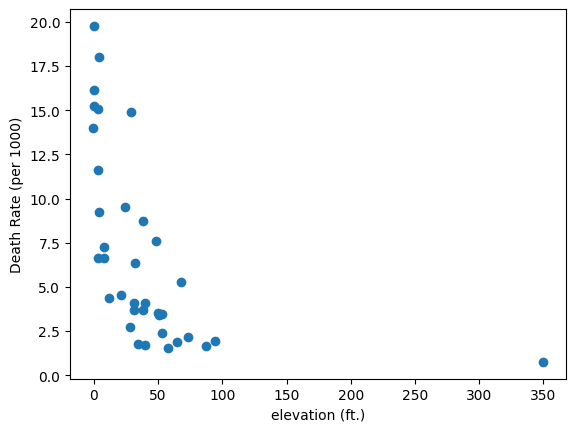

In [25]:
# Generate scatterplots of variables vs. mortality

#set the x and y variables to use for the plot
x = ByDistrict['elevation']
y = ByDistrict['deaths_per_1000']

# Put the dots on the plot
# the plt indicates that we are using the matplotlib library and pyplot
plt.scatter(x, y)

# Here we add a 'line of best fit' that helps us visualize potential correlation!
# the np indicates that we are using the numpy library to calculate slope and intercept values

plt.xlabel('elevation (ft.)')
plt.ylabel('Death Rate (per 1000)')

# The above text all sets up how the plot will look.  The final step is below.
# This code will show or reveal the plot. 
plt.show()

## 📓 Reflection 📓

Did you notice any interesting or unexpected patterns in the data? What do you think they suggest, if anything?